Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import random


CLOSED_ACCOUNT_CLASS_NAME = 'Attrited Customer'
DONT_CLOSED_ACCOUNT_CLASS_NAME = 'Existing Customer'
CLOSED_ACCOUNT_CLASS_VALUE = 1
DONT_CLOSED_ACCOUNT_CLASS_VALUE = 0

# Transformações dos dados

[Dataset Link
](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

Leitura da base

In [2]:
df=pd.read_csv('BankChurners.csv',sep=',')

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Remove as colunas que aparentam ser resultados do Naive Bayes

In [4]:
 df = df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ],axis=1)

Atualiza os valores da classe

In [5]:
df["Attrition_Flag"].replace({DONT_CLOSED_ACCOUNT_CLASS_NAME: DONT_CLOSED_ACCOUNT_CLASS_VALUE, 
                              CLOSED_ACCOUNT_CLASS_NAME: CLOSED_ACCOUNT_CLASS_VALUE}, inplace=True)


Distribuição de classes

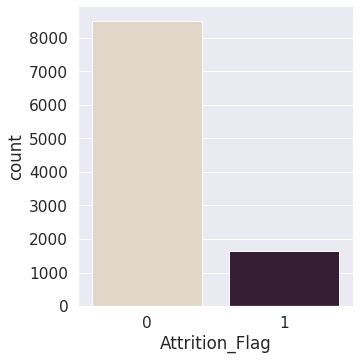

In [6]:
sns.set(font_scale = 1.4)
sns_plot = sns.catplot(x="Attrition_Flag", kind="count", palette="ch:.25", data=df)
sns_plot.savefig("attrition.png")

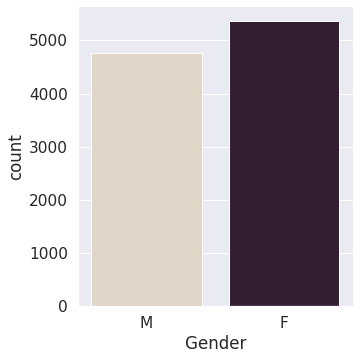

In [7]:
sns.set(font_scale = 1.4)
sns_plot = sns.catplot(x="Gender", kind="count", palette="ch:.25", data=df)
sns_plot.savefig("gender.png")

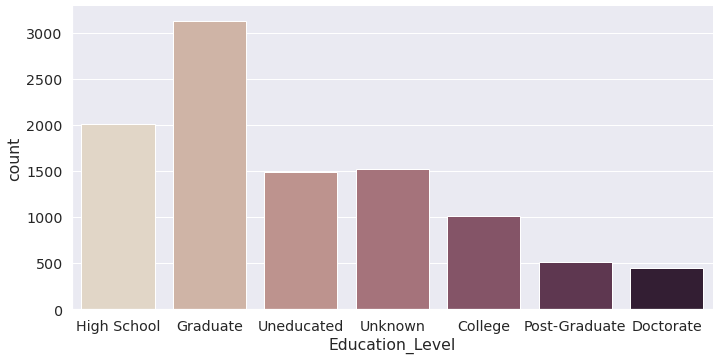

In [8]:
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(x="Education_Level", kind="count", palette="ch:.25", data=df, aspect=2)
sns_plot.savefig("education.png")

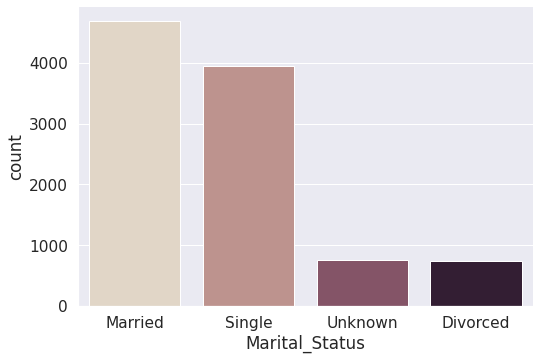

In [9]:
sns.set(font_scale = 1.4)
sns_plot = sns.catplot(x="Marital_Status", kind="count", palette="ch:.25", data=df, aspect=1.5)
sns_plot.savefig("marital.png")

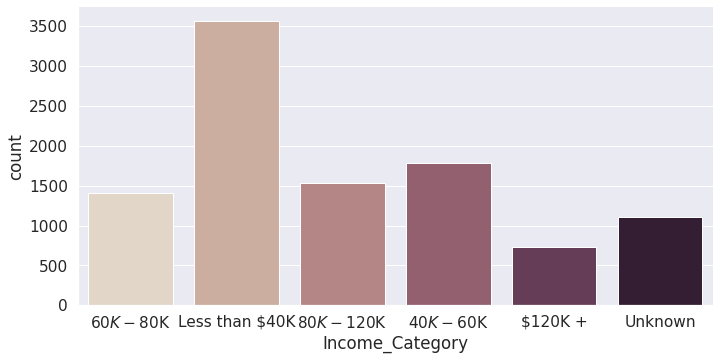

In [10]:
sns.set(font_scale = 1.4)
sns_plot = sns.catplot(x="Income_Category", kind="count", palette="ch:.25", data=df, aspect=2)
sns_plot.savefig("income.png")

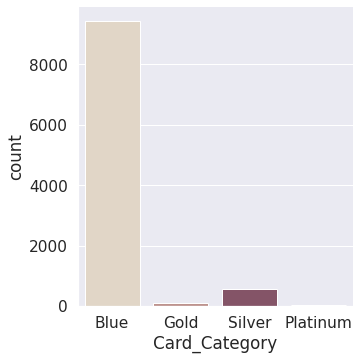

In [11]:
sns.set(font_scale = 1.4)
sns_plot = sns.catplot(x="Card_Category", kind="count", palette="ch:.25", data=df, aspect=1.0)
sns_plot.savefig("card.png")

In [12]:
#import matplotlib.pyplot as plt

#f, ax = plt.subplots(1, 1,figsize=(14,10))
#ax.plot(n_list,dist_list)
#ax.set_xlabel('n')
#ax.set_ylabel('dist')

class_count = [df.loc[df['Attrition_Flag'] == DONT_CLOSED_ACCOUNT_CLASS_VALUE].shape[0], df.loc[df['Attrition_Flag'] == CLOSED_ACCOUNT_CLASS_VALUE].shape[0]]

trace1 = go.Bar(x = [DONT_CLOSED_ACCOUNT_CLASS_NAME],
                y = [class_count[0]],
                text='%0.0f (%0.2f%%)' % (class_count[0], class_count[0]/df.shape[0] * 100),
                textposition='outside')
trace2 = go.Bar(x = [CLOSED_ACCOUNT_CLASS_NAME],
                y = [class_count[1]],
                text='%0.0f (%0.2f%%)' % (class_count[1], class_count[1]/df.shape[0] * 100),
                textposition='outside')
data = [trace1, trace2]

fig = go.Figure()
fig.update_layout(title='Attrition_Flag')
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.show()

Primeiros elementos do dataset

In [13]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [14]:
# 'CLIENTNUM',
# 'Customer_Age',
# 'Dependent_count',
# 'Months_on_book',
# 'Total_Relationship_Count',
# 'Months_Inactive_12_mon',
# 'Contacts_Count_12_mon',
# 'Credit_Limit',
# 'Total_Revolving_Bal',
# 'Avg_Open_To_Buy',
# 'Total_Amt_Chng_Q4_Q1',
# 'Total_Trans_Amt',
# 'Total_Trans_Ct',
# 'Total_Ct_Chng_Q4_Q1',
# 'Avg_Utilization_Ratio',

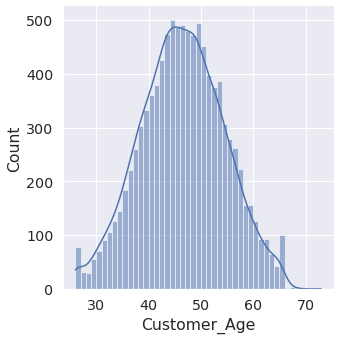

In [15]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Customer_Age", kde=True)
sns_plot.savefig("age.png")

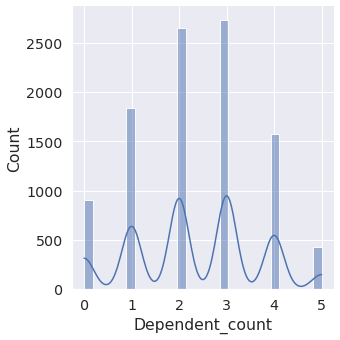

In [16]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Dependent_count", kde=True)
sns_plot.savefig("dependent.png")

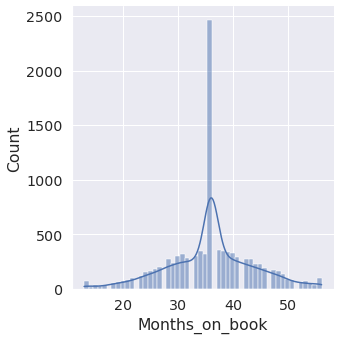

In [17]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Months_on_book", kde=True)
sns_plot.savefig("book.png")

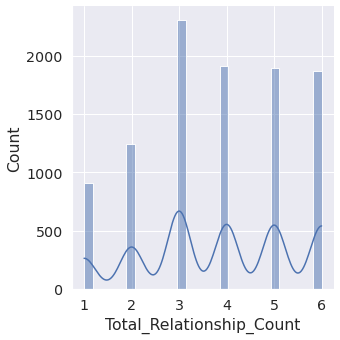

In [18]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Total_Relationship_Count", kde=True)
sns_plot.savefig("relationship.png")

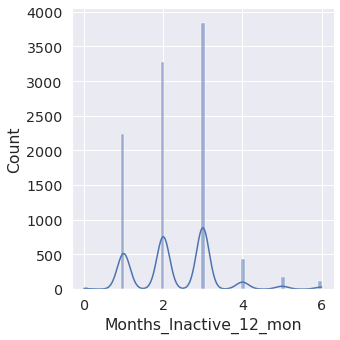

In [19]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Months_Inactive_12_mon", kde=True)
sns_plot.savefig("inactive.png")

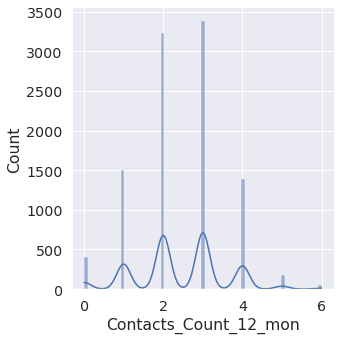

In [20]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Contacts_Count_12_mon", kde=True)
sns_plot.savefig("contacts.png")

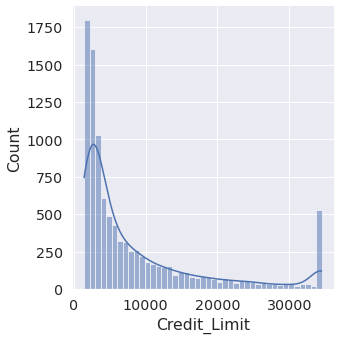

In [21]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Credit_Limit", kde=True)
sns_plot.savefig("credit.png")

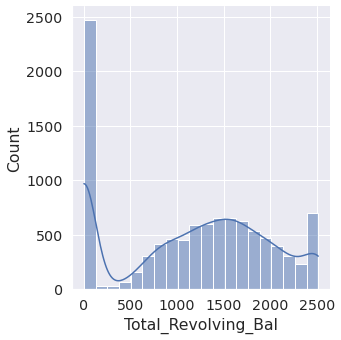

In [22]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Total_Revolving_Bal", kde=True)
sns_plot.savefig("revolution.png")

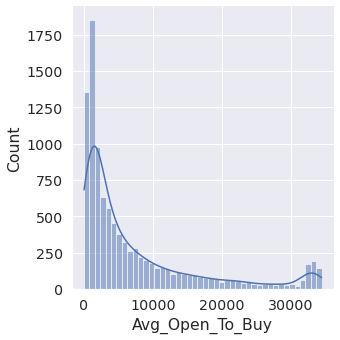

In [23]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Avg_Open_To_Buy", kde=True)
sns_plot.savefig("open.png")

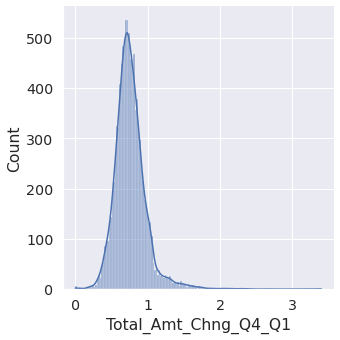

In [24]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Total_Amt_Chng_Q4_Q1", kde=True)
sns_plot.savefig("change.png")

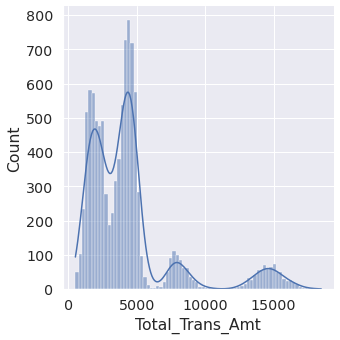

In [25]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Total_Trans_Amt", kde=True)
sns_plot.savefig("amount.png")

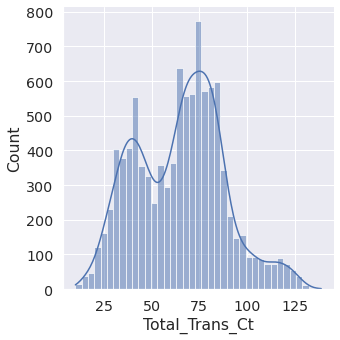

In [26]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Total_Trans_Ct", kde=True)
sns_plot.savefig("transitions.png")

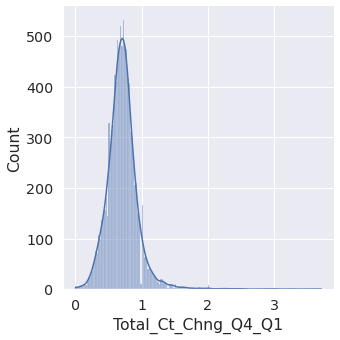

In [27]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Total_Ct_Chng_Q4_Q1", kde=True)
sns_plot.savefig("count_change.png")

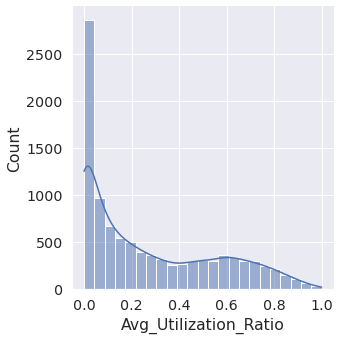

In [28]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=df, x="Avg_Utilization_Ratio", kde=True)
sns_plot.savefig("ratio.png")

Checando missing values

In [29]:
missing_list = []
for data in df.columns:
    if len(df[df[data].isna()]) > 0:
        missing_lis.append(data)
if len(missing_list) == 0:
    print('No missing values')
else:
    print(missing_list)

No missing values


Transformação dos atributos categóricos

In [30]:
categorical_list = []
numerical_list = []
for column in df.columns:
    if df[column].describe().dtype == 'O':
        categorical_list.append(column)
    else:
        numerical_list.append(column)

categorical_dic = {}
for att in categorical_list:
    categorical_dic[att] = {}
    key = 0
    for data in df[att].unique():
        categorical_dic[att][data] = key
        key += 1

for att in categorical_list:
    df[att] = df[att].apply(lambda x: categorical_dic[att][x])

In [31]:
categorical_list

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [32]:
numerical_list

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Separação X e y

In [33]:
y = df.iloc[:,1]
X = df.drop(['Attrition_Flag','CLIENTNUM'],axis=1)

In [34]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,0,3,0,0,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,1,5,1,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,0,3,1,0,2,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,1,4,0,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,0,3,2,0,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,2,1,1,3,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,0,2,3,3,3,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,1,0,0,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,0,2,1,2,3,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Normalização min-max

In [35]:
X_norm = X.copy()
max_list = np.max(X)
min_list = np.min(X)
for i, max in enumerate(max_list):
    X_norm.iloc[:,i] = (X_norm.iloc[:,i] - min_list[i])/(max - min_list[i])

PCA 

In [36]:
from sklearn.decomposition import PCA
variance_list = []
components_list = []
for n in range(len(X.columns)+1):
    pca = PCA(n_components=n)
    pca.fit(X)
    variance_list.append(pca.explained_variance_ratio_.sum())
    components_list.append(n)

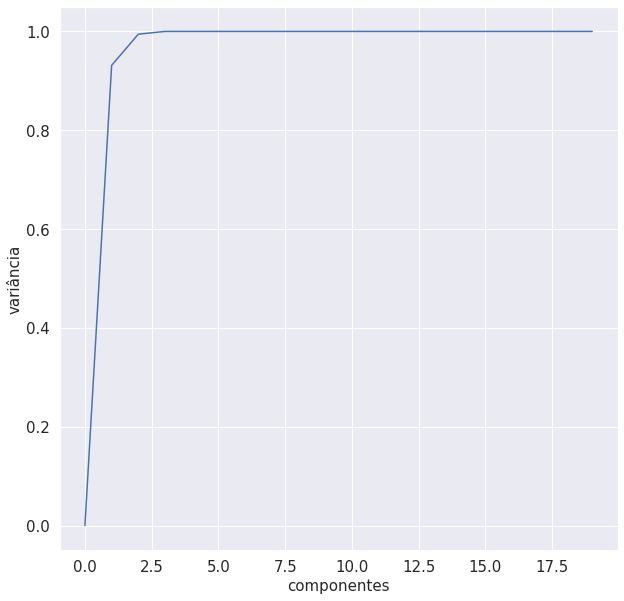

In [37]:
f, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot(components_list, variance_list)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('variância', size = 15)
ax.set_xlabel('componentes', size = 15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.savefig('pca.png')

Transformação da base

In [38]:
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

PCA na base normalizada

In [39]:
variance_list = []
components_list = []
for n in range(len(X.columns)+1):
    pca = PCA(n_components=n)
    pca.fit(X_norm)
    variance_list.append(pca.explained_variance_ratio_.sum())
    components_list.append(n)

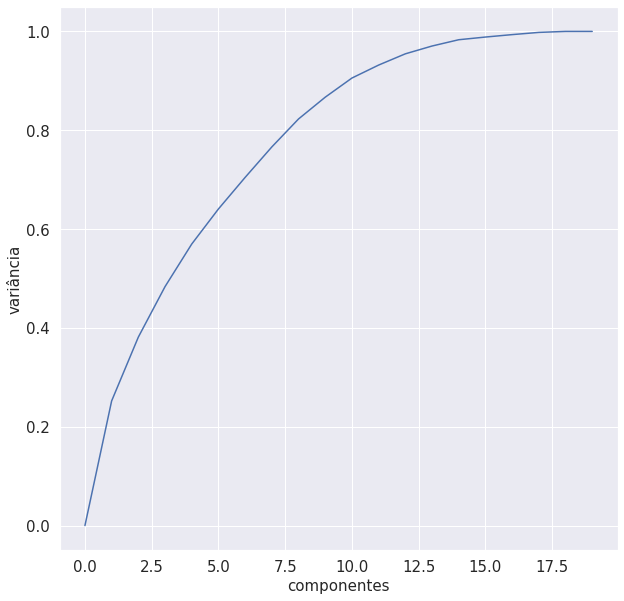

In [40]:
f, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot(components_list, variance_list)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('variância', size = 15)
ax.set_xlabel('componentes', size = 15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.savefig('pca_norm.png')

# Classificação

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import time

K_VALUE = 10
seed = 7
stratifiedKfold = StratifiedKFold(n_splits=K_VALUE, random_state=seed, shuffle=True)

## Funções (Acurácia, Precision, Recall, F1, Matriz de confusao, Curva ROC)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support

def metricas_de_avaliacao(y_true, y_pred, label):
  return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred, zero_division=0),
                    'recall': recall_score(y_true, y_pred),
                    'f1': f1_score(y_true, y_pred)},
                   name=label)
  
def gerar_metricas_de_avaliacao(clf_names, param_descs, dataset_names, clf_list, X_list, y, cv, file_name):
  pd_series_list = []
  for i in range(0, len(clf_list)):
    y_pred = cross_val_predict(clf_list[i], X_list[i], y, cv=cv)
    #pd_series_list.append(metricas_de_avaliacao(y, y_pred, '%s  %s  %s' % (clf_names[i], param_descs[i], dataset_names[i])))
    pd_series_list.append(metricas_de_avaliacao(y, y_pred, '%s' % (clf_names[i])))
    
  pd_metrics = pd.concat(pd_series_list, axis=1)
  pd_metrics.to_csv("%s.csv" % (file_name))
  return pd_metrics

In [43]:
from sklearn.metrics import confusion_matrix

def create_conf_matrix_pd(conf_matrix):
  conf_matrix = np.array(conf_matrix)
  return pd.concat([conf_matrix_pd(conf_matrix[:,0], 'P'),
                    conf_matrix_pd(conf_matrix[:,1], 'N')],
                    axis=1)

def conf_matrix_pd(conf_matrix_class_result, label):
  return pd.Series({'P': conf_matrix_class_result[0],
                    'N': conf_matrix_class_result[1]},
                    name=label)

def gerar_matriz_de_confusao(clf_names, param_descs, dataset_names, clf_list, X_list, y, cv):
  plt.rcParams.update(plt.rcParamsDefault)
  for i in range(0, len(clf_list)):
    y_pred = cross_val_predict(clf_list[i], X_list[i], y, cv=cv)
    conf_matrix = confusion_matrix(y, y_pred)
    pd_conf_matrix = create_conf_matrix_pd(conf_matrix)
    #pd_conf_matrix.to_csv("%s_%s_matriz_de_confusao_%s.csv" % (clf_names[i], param_descs[i], dataset_names[i]))
    pd_conf_matrix.to_csv("%s_matriz_de_confusao.csv" % (clf_names[i]))
    group_names = ['TP','FP','FN','TN']
    group_counts = ["{0:0.0f}".format(value) for value in np.array(conf_matrix).flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in np.array(conf_matrix).flatten()/np.sum(np.array(conf_matrix))]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    f, ax = plt.subplots(figsize=(3, 2))
    conf_matrix_plot = sns.heatmap(pd_conf_matrix, annot=labels, fmt='', cmap="RdBu", annot_kws={"fontsize":10}, ax=ax)
    #conf_matrix_plot.set_title('%s - %s - %s'  % (clf_names[i], param_descs[i], dataset_names[i]))
    conf_matrix_plot.set_title('%s'  % (clf_names[i]))
    conf_matrix_plot.set_xticklabels(conf_matrix_plot.get_xmajorticklabels(), fontsize = 12)
    conf_matrix_plot.set_yticklabels(conf_matrix_plot.get_ymajorticklabels(), fontsize = 12)


    #conf_matrix_plot.figure.savefig("%s_%s_matriz_de_confusao_%s.png" % (clf_names[i], param_descs[i], dataset_names[i]))
    conf_matrix_plot.figure.savefig("%s_matriz_de_confusao.png" % (clf_names[i]))
    plt.show()
    plt.clf()

In [44]:
def gerar_curva_roc(clf_names, param_descs, dataset_names, clf_list, X_list, y, cv):
  plt.rcParams.update(plt.rcParamsDefault)
  for i in range(0, len(clf_list)):
    probs = cross_val_predict(clf_list[i], X_list[i], y, cv=cv, method='predict_proba')
    fpr, tpr, threshold = metrics.roc_curve(y, probs[:,1])
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    #plt.title('%s - %s - %s' % (clf_names[i], param_descs[i], dataset_names[i]))
    plt.title('%s' % (clf_names[i]))
    plt.plot(fpr, tpr, 'b', label = '%s (AUC = %.3f)' % (clf_names[i],roc_auc))
    plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    #plt.savefig("%s_%s_curva_roc_%s.png" % (clf_names[i], param_descs[i], dataset_names[i]))
    plt.savefig("%s_curva_roc.png" % (clf_names[i]))

## Árvore - Estimativa de parâmetros

In [45]:
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

dataset_names = ['default', 'normalized', 'pca']
dataset_list = [X, X_norm, X_pca]

clf = DecisionTreeClassifier()
clf_list = []
depth_list = []

for i in range(1,101):
  clf = DecisionTreeClassifier(max_depth=i)
  clf_list.append(clf)
  depth_list.append(i)

#Irá armazenar os melhores de cada base
decision_tree_means_scores = []
decision_tree_best_scores = []
decision_tree_best_scores_std = []
decision_tree_best_depths = []
decision_tree_mean_scores = []
decision_tree_mean_scores_std = []

for i in range(0, len(dataset_names)):
  text_file = open('decision_tree_estimativa_parametros_%s.txt' % (dataset_names[i]), 'w')
  text_file.write("Arvore de Decisao \n")
  text_file.write("Base %s \n" % (dataset_names[i]))
  text_file.write("======================\n")
  text_file.write("Individual\n")

  scores_list = []
  time_list = []
  for clf in clf_list:
    inicio = time.time()
    scores = cross_val_score(clf, dataset_list[i], y, cv=stratifiedKfold)
    scores_list.append(scores)
    fim = time.time()
    time_list.append(fim - inicio)
    
    text_file.write("\nmax_depth = %0.0f - Accuracy: %0.4f (+/- %0.4f) \n" % (clf.max_depth, np.mean(scores), np.std(scores)))
    kfoldAcurracyLine = "\t k-fold (k = %0.0f) Accuracy = [" % (K_VALUE)
    for j in range(0, len(scores)):
      if j == len(scores) -1:
        kfoldAcurracyLine += " %0.4f ]" % (scores[j])
      else:
        kfoldAcurracyLine += " %0.4f ," % (scores[j])
    text_file.write(kfoldAcurracyLine + "\n")


  scores_list = np.array(scores_list)
  mean_scores = scores_list.mean(axis=1)

  best_score = np.max(mean_scores)
  index_best = np.argmax(mean_scores)
  best_depth = depth_list[index_best]
  best_score_std = np.std(scores_list[index_best])

  text_file.write("======================\n")
  text_file.write("\n")
  text_file.write("======================\n")
  text_file.write("Melhor resultado: \n")
  text_file.write("max_depth = %0.0f - Accuracy: %0.4f (+/- %0.4f) \n" % (best_depth, best_score, best_score_std))
  text_file.write("\n")
  text_file.write("Média das Acurácias: %0.4f\n" % (mean_scores.mean()))
  text_file.write("======================\n")
  text_file.close()
  
  decision_tree_means_scores.append(mean_scores)
  decision_tree_best_scores.append(best_score)
  decision_tree_best_scores_std.append(best_score_std)
  decision_tree_best_depths.append(best_depth)

  print("===== base %s =====" % dataset_names[i])
  print("best_score %0.4f" % best_score)
  print("best_score_std %0.4f" % best_score_std)
  print("max_depth %0.0f" % best_depth)
  print("mean_score %0.4f" % mean_scores.mean())
  print("mean_score_std %0.4f" % mean_scores.std())
  print()

===== base default =====
best_score 0.9444
best_score_std 0.0079
max_depth 7
mean_score 0.9354
mean_score_std 0.0111

===== base normalized =====
best_score 0.9443
best_score_std 0.0080
max_depth 7
mean_score 0.9357
mean_score_std 0.0112

===== base pca =====
best_score 0.9144
best_score_std 0.0071
max_depth 7
mean_score 0.9008
mean_score_std 0.0069



Resultados em cada base

In [46]:
def decision_tree_infos(max_depth, best_score, best_score_std, mean_score, mean_score_std, label):
  return pd.Series({'max_depth': '%0.0f' % max_depth,
                    'Best Score': '%0.4f' %  best_score,
                    'Best Score Std': '%0.4f' %  best_score_std,
                    'Mean Score': '%0.4f' % mean_score,
                    'Mean Score Std': '%0.4f' % mean_score_std},
                    name=label)


pd_series_list = []

for i in range(0, len(dataset_names)):
  	pd_series_list.append(decision_tree_infos(
                            decision_tree_best_depths[i],
                            decision_tree_best_scores[i],
                            decision_tree_best_scores_std[i],
                            decision_tree_means_scores[i].mean(),
                            decision_tree_means_scores[i].std(), 
                            dataset_names[i]))

pd.concat(pd_series_list, axis=1)

decision_tree_pd = pd.concat(pd_series_list, axis=1)
decision_tree_pd.to_csv("decision_tree_resultado_melhores_parametros.csv")
decision_tree_pd

,default,normalized,pca
max_depth,7,7,7
Best Score,0.9444,0.9443,0.9144
Best Score Std,0.0079,0.0080,0.0071
Mean Score,0.9354,0.9357,0.9008
Mean Score Std,0.0111,0.0112,0.0069


Acurácia, Precision, Recall, F1

In [47]:
clf_names = [
   "AD max_depth = 7 default",
   "AD max_depth = 7 normalized",
   "AD max_depth = 7 pca"
]

dataset_names = [
    'default', 
    'normalized', 
    'pca'
]

clf_list = [
    DecisionTreeClassifier(max_depth=7),
    DecisionTreeClassifier(max_depth=7),
    DecisionTreeClassifier(max_depth=7)
]

param_descs = [
   "k=%0.0f" % (clf_list[0].max_depth),
   "k=%0.0f" % (clf_list[1].max_depth),
   "k=%0.0f" % (clf_list[2].max_depth)
]

X_list = [
   X,
   X_norm,
   X_pca
]

gerar_metricas_de_avaliacao(clf_names, param_descs, dataset_names, clf_list, X_list, y, stratifiedKfold, 'decision_tree_resultado_melhores_parametros_metricas_de_avaliacao')

,AD max_depth = 7 default,AD max_depth = 7 normalized,AD max_depth = 7 pca
accuracy,0.944209,0.944604,0.914486
precision,0.843023,0.844761,0.749836
recall,0.802090,0.802704,0.701905
f1,0.822047,0.823196,0.725079


Gráfico de acurácia e tempo

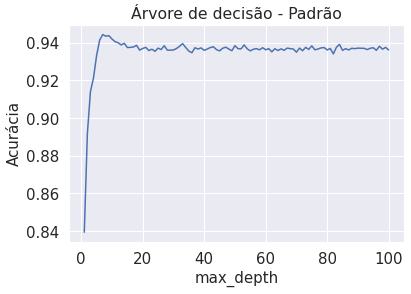

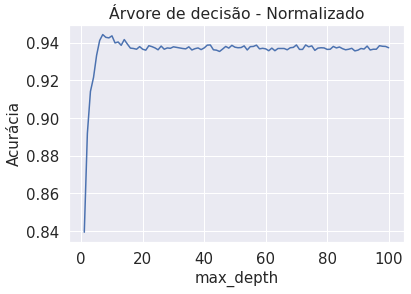

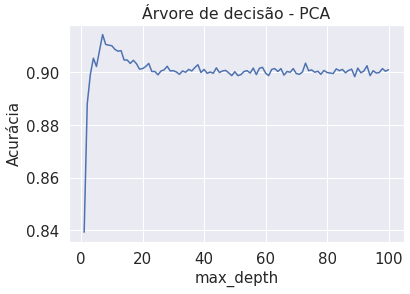

In [48]:
dataset_names = ['Padrão', 'Normalizado', 'PCA']
for i in range(0, len(dataset_names)):
  #f, ax = plt.subplots(1, 2, figsize=(14,10))
  f, ax = plt.subplots()
  ax.set_title('Árvore de decisão - %s' % (dataset_names[i]))
  ax.set_xlabel('max_depth',size=15)
  ax.set_ylabel('Acurácia',size=15)
  ax.tick_params(axis="x", labelsize=15)
  ax.tick_params(axis="y", labelsize=15)
  ax.plot(depth_list,decision_tree_means_scores[i])
  #ax[1].set_title('Decision Tree - %s' % (dataset_names[i]))
  #ax[1].set_xlabel('max_depth',size=12)
  #ax[1].set_ylabel('Time (seconds)',size=12)
  #ax[1].plot(depth_list,decision_tree_train_times[i])

  plt.savefig('decision_tree_acuracia_%s.png' % dataset_names[i], bbox_inches = "tight")
  plt.show()

## Naive Bayes - Estimativa de parâmetros

In [49]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB


gaussian_time = time.time()
clf = GaussianNB()
gaussian_score = cross_val_score(clf, X, y, cv=stratifiedKfold).mean()
gaussian_time = time.time() - gaussian_time

bernoulli_time = time.time()
clf = BernoulliNB()
bernoulli_score = cross_val_score(clf, X, y, cv=stratifiedKfold).mean()
bernoulli_time = time.time() - bernoulli_time

complement_time = time.time()
clf = ComplementNB()
complement_score = cross_val_score(clf, X, y, cv=stratifiedKfold).mean()
complement_time = time.time() - complement_time

multinomial_time = time.time()
clf = MultinomialNB()
multinomial_score = cross_val_score(clf, X, y, cv=stratifiedKfold).mean()
multinomial_time = time.time() - multinomial_time

In [50]:
nb_pd = pd.concat([pd.Series({'Gaussian': gaussian_score,
           'BernoulliNB': bernoulli_score,
           'Complement': complement_score,
           'Multinomial': multinomial_score},
            name='accuracy'), 
           pd.Series({'Gaussian': gaussian_time,
           'BernoulliNB': bernoulli_time,
           'Complement': complement_time,
           'Multinomial': multinomial_time},
            name='time')
           ],axis = 1)

nb_pd = nb_pd.sort_values(by=['accuracy'], ascending=False)
nb_pd.to_csv("diferentes_naive_bayes_comparacao_default.csv")
nb_pd

,accuracy,time
Gaussian,0.893553,0.076729
BernoulliNB,0.779104,0.082311
Multinomial,0.656957,0.060684
Complement,0.656660,0.061702


In [51]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB

dataset_names = ['default', 'normalized', 'pca']
dataset_list = [X, X_norm, X_pca]

clf = GaussianNB()
clf_list = []
smoothing_list = []

#smoothing = 0.0000000001
smoothing = 0.00000000000000001
for i in range(0,400):
  if i > 0:
    #smoothing = smoothing + 0.0000000125
    smoothing = smoothing + 0.00000000000000000125
  clf = GaussianNB(var_smoothing=smoothing)
  smoothing_list.append(smoothing)
  clf_list.append(clf)


#Irá armazenar os melhores de cada base
gaussian_nb_means_scores = []
gaussian_nb_best_scores = []
gaussian_nb_best_scores_std = []
gaussian_nb_best_var_smoothing = []
gaussian_nb_mean_scores = []
gaussian_nb_mean_scores_std = []

for i in range(0, len(dataset_names)):
  text_file = open('gaussian_nb_estimativa_parametros_%s.txt' % (dataset_names[i]), 'w')
  text_file.write("Gaussian Naive Bayes \n")
  text_file.write("Base %s \n" % (dataset_names[i]))
  text_file.write("======================\n")
  text_file.write("Individual\n")

  scores_list = []
  time_list = []
  for clf in clf_list:
    inicio = time.time()
    scores = cross_val_score(clf, dataset_list[i], y, cv=stratifiedKfold)
    scores_list.append(scores)
    fim = time.time()
    time_list.append(fim - inicio)
    
    text_file.write("\nvar_smoothing = %0.20f - Accuracy: %0.4f (+/- %0.4f) \n" % (clf.var_smoothing, np.mean(scores), np.std(scores)))
    kfoldAcurracyLine = "\t k-fold (k = %0.0f) Accuracy = [" % (K_VALUE)
    for j in range(0, len(scores)):
      if j == len(scores) -1:
        kfoldAcurracyLine += " %0.4f ]" % (scores[j])
      else:
        kfoldAcurracyLine += " %0.4f ," % (scores[j])
    text_file.write(kfoldAcurracyLine + "\n")


  scores_list = np.array(scores_list)
  mean_scores = scores_list.mean(axis=1)

  best_score = np.max(mean_scores)
  index_best = np.argmax(mean_scores)
  best_var_smoothing = smoothing_list[index_best]
  best_score_std = np.std(scores_list[index_best])

  text_file.write("======================\n")
  text_file.write("\n")
  text_file.write("======================\n")
  text_file.write("Melhor resultado: \n")
  text_file.write("var_smoothing = %0.20f - Accuracy: %0.4f (+/- %0.4f) \n" % (best_var_smoothing, best_score, best_score_std))
  text_file.write("\n")
  text_file.write("Média das Acurácias: %0.4f\n" % (mean_scores.mean()))
  text_file.write("======================\n")
  text_file.close()
  
  gaussian_nb_means_scores.append(mean_scores)
  gaussian_nb_best_scores.append(best_score)
  gaussian_nb_best_scores_std.append(best_score_std)
  gaussian_nb_best_var_smoothing.append(best_var_smoothing)

  print("===== base %s =====" % dataset_names[i])
  print("best_score %0.4f" % best_score)
  print("best_score_std %0.4f" % best_score_std)
  print("best_var_smoothing %0.20f" % best_var_smoothing)
  print("mean_score %0.4f" % mean_scores.mean())
  print("mean_score_std %0.4f" % mean_scores.std())
  print()

===== base default =====
best_score 0.8883
best_score_std 0.0077
best_var_smoothing 0.00000000000000001000
mean_score 0.8883
mean_score_std 0.0000

===== base normalized =====
best_score 0.8883
best_score_std 0.0077
best_var_smoothing 0.00000000000000001000
mean_score 0.8883
mean_score_std 0.0000

===== base pca =====
best_score 0.8762
best_score_std 0.0063
best_var_smoothing 0.00000000000000001000
mean_score 0.8762
mean_score_std 0.0000



In [52]:
def gaussian_naive_bayes_infos(var_smoothing, best_score, best_score_std, mean_score, mean_score_std, label):
  return pd.Series({'var_smoothing': '%0.20f' % var_smoothing,
                    'Best Score': '%0.4f' %  best_score,
                    'Best Score Std': '%0.4f' %  best_score_std,
                    'Mean Score': '%0.4f' % mean_score,
                    'Mean Score Std': '%0.4f' % mean_score_std},
                    name=label)


pd_series_list = []

for i in range(0, len(dataset_names)):
  	pd_series_list.append(gaussian_naive_bayes_infos(
                            gaussian_nb_best_var_smoothing[i],
                            gaussian_nb_best_scores[i],
                            gaussian_nb_best_scores_std[i],
                            gaussian_nb_means_scores[i].mean(),
                            gaussian_nb_means_scores[i].std(), 
                            dataset_names[i]))

gaussian_nb_pd = pd.concat(pd_series_list, axis=1)
gaussian_nb_pd.to_csv("gaussian_nb_resultado_melhores_parametros.csv")
gaussian_nb_pd

,default,normalized,pca
var_smoothing,0.00000000000000001000,0.00000000000000001000,0.00000000000000001000
Best Score,0.8883,0.8883,0.8762
Best Score Std,0.0077,0.0077,0.0063
Mean Score,0.8883,0.8883,0.8762
Mean Score Std,0.0000,0.0000,0.0000


Acurácia, Precision, Recall, F1

In [53]:
clf_names = [
   "AD var_smoothing = 1e-9 default",
   "AD var_smoothing = 1e-9 normalized",
   "AD var_smoothing = 1e-9 pca"
]

dataset_names = [
    'default', 
    'normalized', 
    'pca'
]

clf_list = [
    GaussianNB(),
    GaussianNB(),
    GaussianNB()
]

param_descs = [
   "var_smoothing=%0.10f" % (clf_list[0].var_smoothing),
   "var_smoothing=%0.10f" % (clf_list[1].var_smoothing),
   "var_smoothing=%0.10f" % (clf_list[2].var_smoothing)
]

X_list = [
   X,
   X_norm,
   X_pca
]

gerar_metricas_de_avaliacao(clf_names, param_descs, dataset_names, clf_list, X_list, y, stratifiedKfold, 'gaussian_nb_resultado_melhores_parametros_metricas_de_avaliacao')

,AD var_smoothing = 1e-9 default,AD var_smoothing = 1e-9 normalized,AD var_smoothing = 1e-9 pca
accuracy,0.893552,0.888318,0.876173
precision,0.685348,0.652522,0.662598
recall,0.623848,0.652120,0.467117
f1,0.653153,0.652321,0.547945


Gráfico de acurácia e tempo

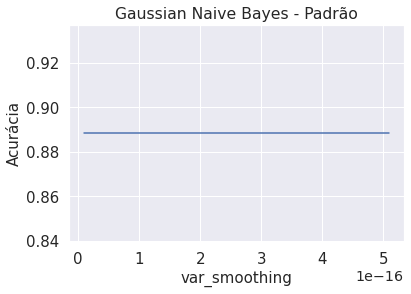

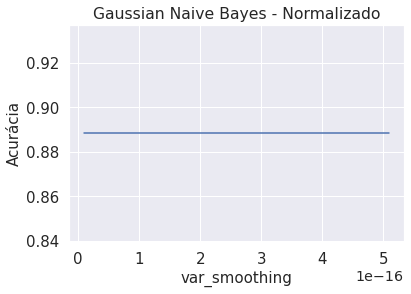

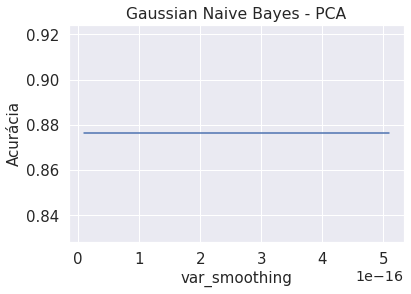

In [54]:
dataset_names = ['Padrão', 'Normalizado', 'PCA']
for i in range(0, len(dataset_names)):
  #f, ax = plt.subplots(1, 2, figsize=(14,10))
  f, ax = plt.subplots()
  ax.set_title('Gaussian Naive Bayes - %s' % (dataset_names[i]))
  ax.set_xlabel('var_smoothing',size=15)
  ax.set_ylabel('Acurácia',size=15)
  ax.tick_params(axis="x", labelsize=15)
  ax.tick_params(axis="y", labelsize=15)
  ax.plot(smoothing_list,gaussian_nb_means_scores[i])
  #ax[1].set_title('Gaussian Naive Bayes - %s' % (dataset_names[i]))
  #ax[1].set_xlabel('var_smoothing',size=12)
  #ax[1].set_ylabel('Time (seconds)',size=12)
  #ax[1].plot(smoothing_list,gaussian_naive_bayes_train_times[i])

  plt.savefig('gaussian_nb_acuracia_%s.png' % dataset_names[i], bbox_inches = "tight")
  plt.show()

## kNN - Estimativa de parâmetros

In [55]:
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

dataset_names = ['default', 'normalized', 'pca']
dataset_list = [X, X_norm, X_pca]

clf_list = []
k_list = []

for i in range(1,30):
  clf = clf = KNeighborsClassifier(n_neighbors=i)
  clf_list.append(clf)
  k_list.append(i)


#Irá armazenar os melhores de cada base
kNN_means_scores = []
kNN_best_scores = []
kNN_best_scores_std = []
kNN_best_k = []
kNN_mean_scores = []
kNN_mean_scores_std = []

for i in range(0, len(dataset_names)):
  text_file = open('kNN_estimativa_parametros_%s.txt' % (dataset_names[i]), 'w')
  text_file.write("kNN \n")
  text_file.write("Base %s \n" % (dataset_names[i]))
  text_file.write("======================\n")
  text_file.write("Individual\n")

  scores_list = []
  time_list = []
  for clf in clf_list:
    inicio = time.time()
    scores = cross_val_score(clf, dataset_list[i], y, cv=stratifiedKfold)
    scores_list.append(scores)
    fim = time.time()
    time_list.append(fim - inicio)
    
    text_file.write("\nk = %0.0f - Accuracy: %0.4f (+/- %0.4f) \n" % (clf.n_neighbors, np.mean(scores), np.std(scores)))
    kfoldAcurracyLine = "\t k-fold (k = %0.0f) Accuracy = [" % (K_VALUE)
    for j in range(0, len(scores)):
      if j == len(scores) -1:
        kfoldAcurracyLine += " %0.4f ]" % (scores[j])
      else:
        kfoldAcurracyLine += " %0.4f ," % (scores[j])
    text_file.write(kfoldAcurracyLine + "\n")


  scores_list = np.array(scores_list)
  mean_scores = scores_list.mean(axis=1)

  best_score = np.max(mean_scores)
  index_best = np.argmax(mean_scores)
  best_k = k_list[index_best]
  best_score_std = np.std(scores_list[index_best])

  text_file.write("======================\n")
  text_file.write("\n")
  text_file.write("======================\n")
  text_file.write("Melhor resultado: \n")
  text_file.write("k = %0.0f - Accuracy: %0.4f (+/- %0.4f) \n" % (best_k, best_score, best_score_std))
  text_file.write("\n")
  text_file.write("Média das Acurácias: %0.4f\n" % (mean_scores.mean()))
  text_file.write("======================\n")
  text_file.close()
  
  kNN_means_scores.append(mean_scores)
  kNN_best_scores.append(best_score)
  kNN_best_scores_std.append(best_score_std)
  kNN_best_k.append(best_k)

  print("===== base %s =====" % dataset_names[i])
  print("best_score %0.4f" % best_score)
  print("best_score_std %0.4f" % best_score_std)
  print("best_k %0.0f" % best_k)
  print("mean_score %0.4f" % mean_scores.mean())
  print("mean_score_std %0.4f" % mean_scores.std())
  print()

===== base default =====
best_score 0.8951
best_score_std 0.0088
best_k 9
mean_score 0.8901
mean_score_std 0.0045

===== base normalized =====
best_score 0.8903
best_score_std 0.0068
best_k 11
mean_score 0.8855
mean_score_std 0.0048

===== base pca =====
best_score 0.8952
best_score_std 0.0089
best_k 9
mean_score 0.8901
mean_score_std 0.0045



In [56]:
def kNN_infos(k, best_score, best_score_std, mean_score, mean_score_std, label):
  return pd.Series({'k': '%0.0f' % k,
                    'Best Score': '%0.4f' %  best_score,
                    'Best Score Std': '%0.4f' %  best_score_std,
                    'Mean Score': '%0.4f' % mean_score,
                    'Mean Score Std': '%0.4f' % mean_score_std},
                    name=label)


pd_series_list = []

for i in range(0, len(dataset_names)):
  	pd_series_list.append(kNN_infos(
                            kNN_best_k[i],
                            kNN_best_scores[i],
                            kNN_best_scores_std[i],
                            kNN_means_scores[i].mean(),
                            kNN_means_scores[i].std(), 
                            dataset_names[i]))

kNN_pd = pd.concat(pd_series_list, axis=1)
kNN_pd.to_csv("kNN_resultado_melhores_parametros.csv")
kNN_pd

,default,normalized,pca
k,9,11,9
Best Score,0.8951,0.8903,0.8952
Best Score Std,0.0088,0.0068,0.0089
Mean Score,0.8901,0.8855,0.8901
Mean Score Std,0.0045,0.0048,0.0045


Acurácia, Precision, Recall, F1

In [57]:
clf_names = [
   "kNN k = 9 default",
   "kNN k = 11 normalized",
   "kNN k = 9 pca"
]

dataset_names = [
    'default', 
    'normalized', 
    'pca'
]

clf_list = [
    KNeighborsClassifier(n_neighbors=9),
    KNeighborsClassifier(n_neighbors=11),
    KNeighborsClassifier(n_neighbors=9)
]

param_descs = [
   "k=%0.0f" % (clf_list[0].n_neighbors),
   "k=%0.0f" % (clf_list[1].n_neighbors),
   "k=%0.0f" % (clf_list[2].n_neighbors)
]



X_list = [
   X,
   X_norm,
   X_pca
]

gerar_metricas_de_avaliacao(clf_names, param_descs, dataset_names, clf_list, X_list, y, stratifiedKfold, 'kNN_resultado_melhores_parametros_metricas_de_avaliacao')

,kNN k = 9 default,kNN k = 11 normalized,kNN k = 9 pca
accuracy,0.895132,0.890293,0.895231
precision,0.717475,0.816953,0.717692
recall,0.572833,0.408728,0.573448
f1,0.637047,0.544859,0.637513


Gráfico de acurácia e tempo

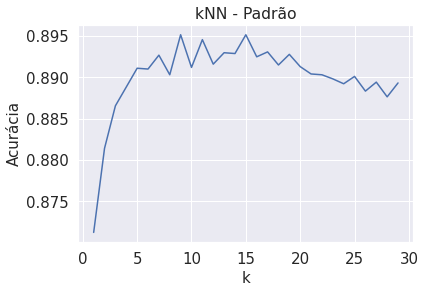

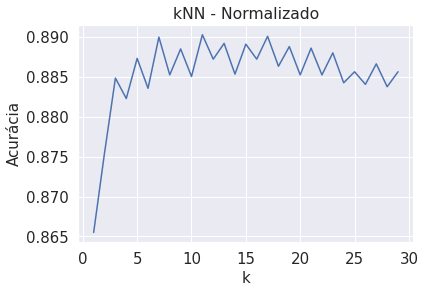

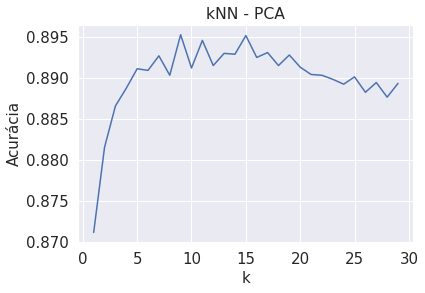

In [58]:
dataset_names = ['Padrão', 'Normalizado', 'PCA']
for i in range(0, len(dataset_names)):
  #f, ax = plt.subplots(1, 2, figsize=(14,10))
  f, ax = plt.subplots()
  ax.set_title('kNN - %s' % (dataset_names[i]))
  ax.set_xlabel('k',size=15)
  ax.set_ylabel('Acurácia',size=15)
  ax.plot(k_list,kNN_means_scores[i])
  ax.tick_params(axis="x", labelsize=15)
  ax.tick_params(axis="y", labelsize=15)
  #ax[1].set_title('Gaussian Naive Bayes - %s' % (dataset_names[i]))
  #ax[1].set_xlabel('var_smoothing',size=12)
  #ax[1].set_ylabel('Time (seconds)',size=12)
  #ax[1].plot(smoothing_list,gaussian_naive_bayes_train_times[i])

  plt.savefig('kNN_acuracia_%s.png' % dataset_names[i], bbox_inches = "tight")

## Resultado Individuais dos classificadores

Acurácia, precision, recall, f1

In [59]:
clf_names = [
   "kNN1",
   "kNN2",
   "kNN3",
   "kNN4",
   "NB1",
   "NB2",
   "AD1",
   "AD2",
   "AD3",
   "AD4"
]

dataset_names = [
    'normalized', 
    'pca', 
    'pca',
    'pca', 
    'default', 
    'pca',
    'default', 
    'normalized', 
    'normalized',
    'normalized'
]

clf_list = [
    KNeighborsClassifier(n_neighbors=11),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=9),
    KNeighborsClassifier(n_neighbors=20),
    GaussianNB(),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=7),
    DecisionTreeClassifier(max_depth=7),
    DecisionTreeClassifier(max_depth=2),
    DecisionTreeClassifier(max_depth=20)
]

param_descs = [
   "k=%0.0f" % (clf_list[0].n_neighbors),
   "k=%0.0f" % (clf_list[1].n_neighbors),
   "k=%0.0f" % (clf_list[2].n_neighbors),
   "k=%0.0f" % (clf_list[3].n_neighbors),
   "var_smoothing=%0.10f" % (clf_list[4].var_smoothing),
   "var_smoothing=%0.10f" % (clf_list[5].var_smoothing),
   "max_depth=%0.0f" % (clf_list[6].max_depth),
   "max_depth=%0.0f" % (clf_list[7].max_depth),
   "max_depth=%0.0f" % (clf_list[8].max_depth),
   "max_depth=%0.0f" % (clf_list[9].max_depth)
]



X_list = [
   X_norm,
   X_pca,
   X_pca,
   X_pca,
   X,
   X_pca,
   X,
   X_norm,
   X_norm,
   X_norm
]

In [60]:
gerar_metricas_de_avaliacao(clf_names, param_descs, dataset_names, clf_list, X_list, y, stratifiedKfold, 'classificadores_para_stacking_metricas_de_avaliacao')

,kNN1,kNN2,kNN3,kNN4,NB1,NB2,AD1,AD2,AD3,AD4
accuracy,0.890293,0.871137,0.895231,0.891281,0.893552,0.876173,0.944011,0.944505,0.891774,0.936803
precision,0.816953,0.603073,0.717692,0.735663,0.685348,0.662598,0.843264,0.844215,0.735164,0.802575
recall,0.408728,0.578980,0.573448,0.504610,0.623848,0.467117,0.800246,0.802704,0.510141,0.804548
f1,0.544859,0.590781,0.637513,0.598615,0.653153,0.547945,0.821192,0.822936,0.602322,0.803560


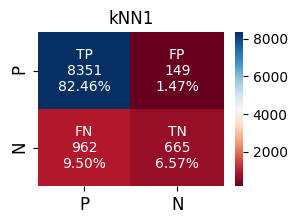

<Figure size 640x480 with 0 Axes>

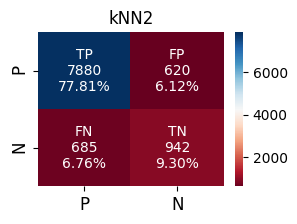

<Figure size 640x480 with 0 Axes>

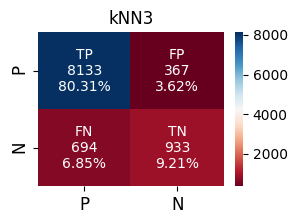

<Figure size 640x480 with 0 Axes>

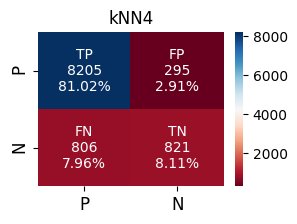

<Figure size 640x480 with 0 Axes>

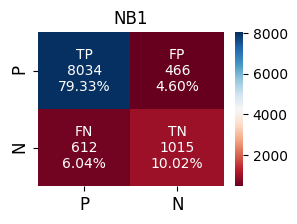

<Figure size 640x480 with 0 Axes>

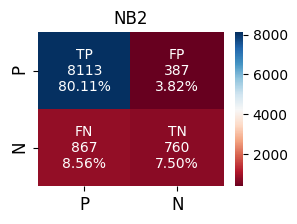

<Figure size 640x480 with 0 Axes>

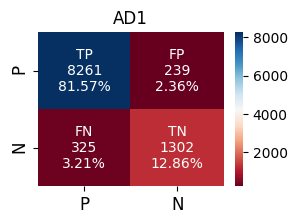

<Figure size 640x480 with 0 Axes>

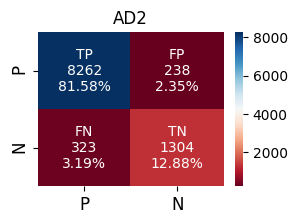

<Figure size 640x480 with 0 Axes>

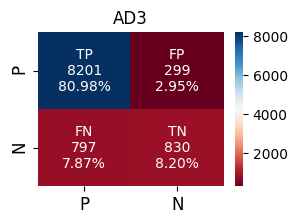

<Figure size 640x480 with 0 Axes>

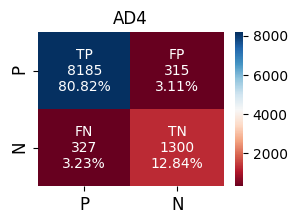

<Figure size 640x480 with 0 Axes>

In [61]:
gerar_matriz_de_confusao(clf_names, param_descs, dataset_names, clf_list, X_list, y, stratifiedKfold)

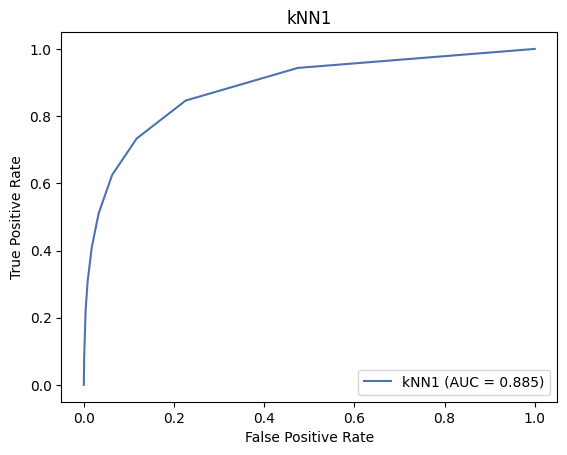

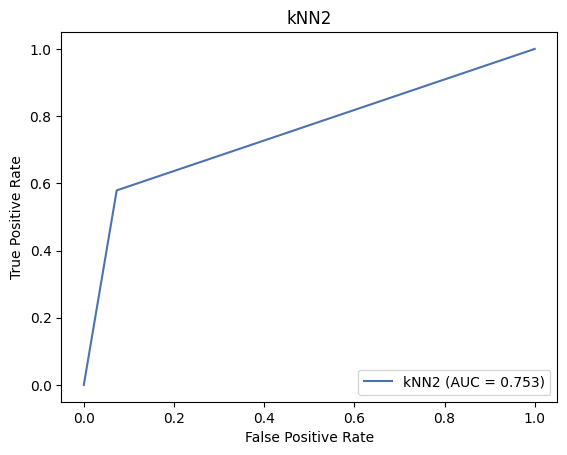

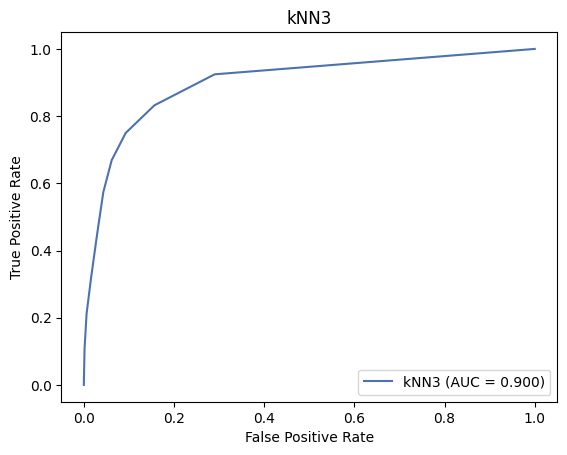

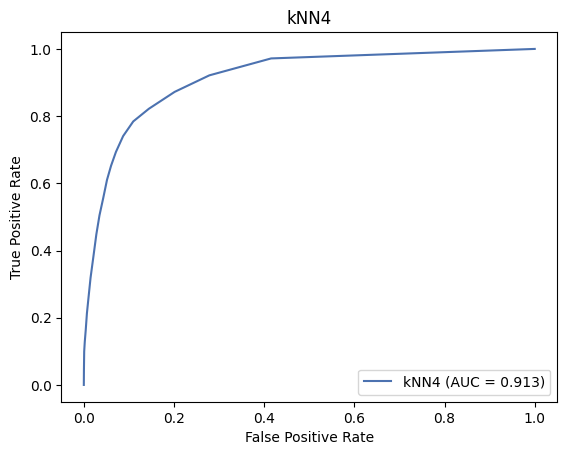

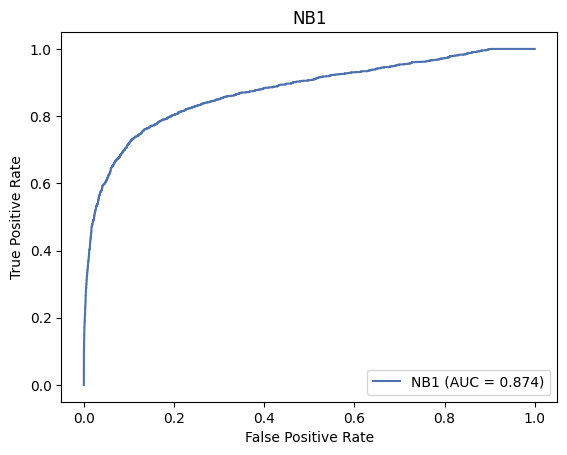

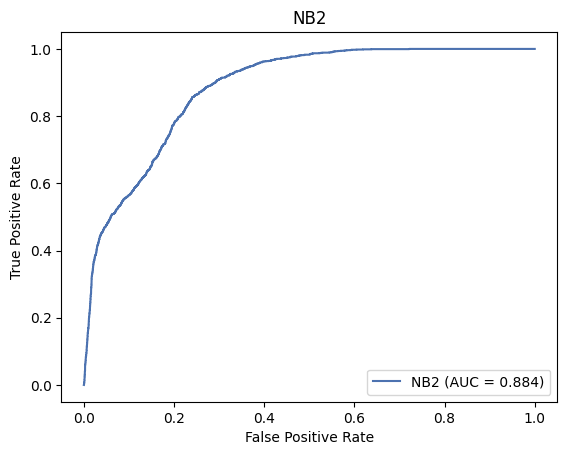

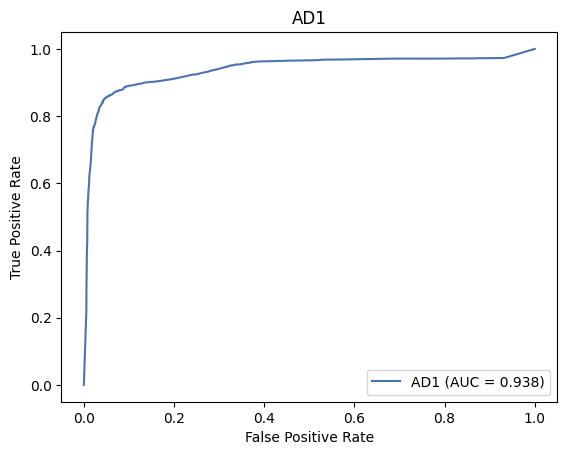

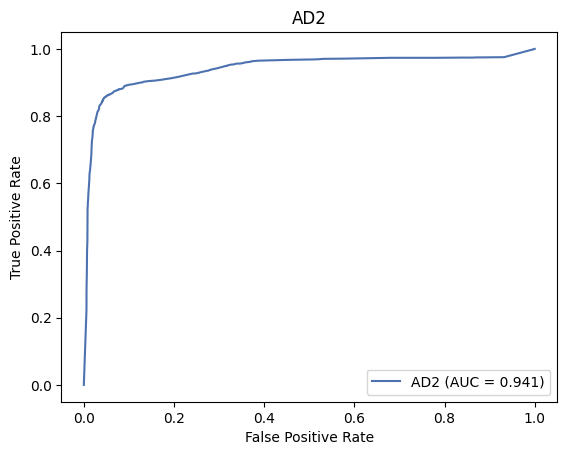

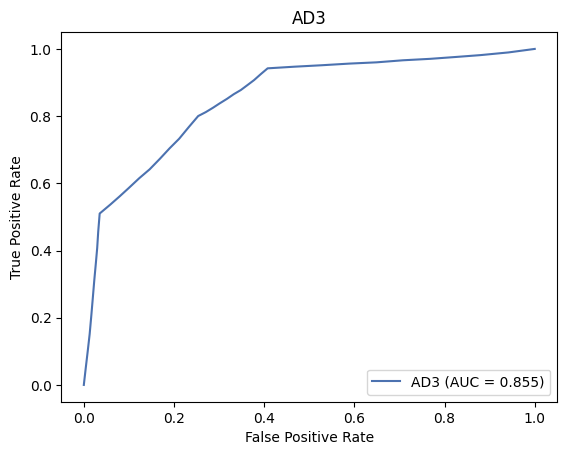

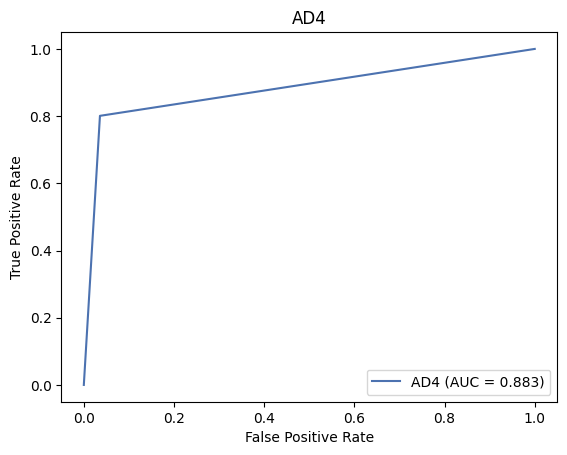

In [62]:
gerar_curva_roc(clf_names, param_descs, dataset_names, clf_list, X_list, y, stratifiedKfold)

## Stacking

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline

min_max = MinMaxScaler()
pca = PCA(n_components=5)

In [64]:
clf1 = KNeighborsClassifier(n_neighbors=11) # será aplicado na base normalizada
clf2 = KNeighborsClassifier(n_neighbors=1) # será aplicado na base com pca
clf3 = KNeighborsClassifier(n_neighbors=9) # será aplicado na base com pca
clf4 = KNeighborsClassifier(n_neighbors=20) # será aplicado na base com pca
clf5 = GaussianNB()
clf6 = GaussianNB() # será aplicado na base com pca
clf7 = DecisionTreeClassifier(max_depth=7)
clf8 = DecisionTreeClassifier(max_depth=7) # será aplicado na base normalizada
clf9 = DecisionTreeClassifier(max_depth=2) # será aplicado na base normalizada
clf10 = DecisionTreeClassifier(max_depth=20) # será aplicado na base normalizada

In [65]:
pipelines = []

pipe1 = make_pipeline(min_max, clf1)
pipelines.append(['kNN k=11 (Normalizada)',pipe1])

pipe2 = make_pipeline(pca, clf2)
pipelines.append(['kNN k=1 (PCA)',pipe2])

pipe3 = make_pipeline(pca, clf3)
pipelines.append(['kNN k=9 (PCA)',pipe3])

pipe4 = make_pipeline(pca, clf4)
pipelines.append(['kNN k=20 (PCA)',pipe4])

pipe5 = make_pipeline(clf5)
pipelines.append(['GausisianNB',pipe5])

pipe6 = make_pipeline(pca, clf6)
pipelines.append(['GausisianNB (PCA)',pipe6])

pipe7 = make_pipeline(clf7)
pipelines.append(['Decision Tree max_depth=7',pipe7])

pipe8 = make_pipeline(min_max, clf8)
pipelines.append(['Decision Tree max_depth=7 (Normalizada)',pipe8])

pipe9 = make_pipeline(min_max, clf9)
pipelines.append(['Decision Tree max_depth=2 (Normalizada)',pipe9])

pipe10 = make_pipeline(min_max, clf10)
pipelines.append(['Decision Tree max_depth=20 (Normalizada)',pipe10])

print(len(pipelines))

print(pipe1)
print(pipe2)
print(pipe3)
print(pipe4)
print(pipe5)
print(pipe6)
print(pipe7)
print(pipe8)
print(pipe9)
print(pipe10)

10
Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=11, p=2,
                                      weights='uniform'))],
         verbose=False)
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
       

Stacking com kNN no Final

In [66]:
kNN_sclf = StackingClassifier(estimators=pipelines, final_estimator=KNeighborsClassifier(), cv=stratifiedKfold)
kNN_sclf_scores = cross_val_score(kNN_sclf, X, y, cv=stratifiedKfold)
kNN_sclf_scores = np.array(kNN_sclf_scores)

print('accuracy: %0.4f (+/- %0.4f)' % (kNN_sclf_scores.mean(), kNN_sclf_scores.std()))

accuracy: 0.9471 (+/- 0.0088)


Stacking com Gaussian Naive Bayes no Final

In [67]:
gaussian_nb_sclf = StackingClassifier(estimators=pipelines, final_estimator=GaussianNB(), cv=stratifiedKfold)
gaussian_nb_sclf_scores = cross_val_score(gaussian_nb_sclf, X, y, cv=stratifiedKfold)
gaussian_nb_sclf_scores = np.array(gaussian_nb_sclf_scores)

print('accuracy: %0.4f (+/- %0.4f)' % (gaussian_nb_sclf_scores.mean(), gaussian_nb_sclf_scores.std()))

accuracy: 0.9232 (+/- 0.0092)


Stacking com Arvore de Decisao no Final

In [68]:
decision_tree_sclf = StackingClassifier(estimators=pipelines, final_estimator=DecisionTreeClassifier(), cv=stratifiedKfold)
decision_tree_sclf_scores = cross_val_score(decision_tree_sclf, X, y, cv=stratifiedKfold)
decision_tree_sclf_scores = np.array(decision_tree_sclf_scores)

print('accuracy: %0.4f (+/- %0.4f)' % (decision_tree_sclf_scores.mean(), decision_tree_sclf_scores.std()))

accuracy: 0.9245 (+/- 0.0093)


Comparando resultados dos Stacking

In [69]:
stacking_pd = pd.concat([pd.Series({'kNN': kNN_sclf_scores.mean(),
                          'Gaussian NB': gaussian_nb_sclf_scores.mean(),
                          'Decision Tree': decision_tree_sclf_scores.mean()},
                            name='accuracy'),
                         pd.Series({'kNN': kNN_sclf_scores.std(),
                          'Gaussian NB': gaussian_nb_sclf_scores.std(),
                          'Decision Tree': decision_tree_sclf_scores.std()},
                            name='std')
                          ],axis = 1)

stacking_pd = stacking_pd.sort_values(by=['accuracy'], ascending=False)
stacking_pd.to_csv("stacking_comparacao_de_desempenho.csv")
stacking_pd

,accuracy,std
kNN,0.947072,0.008844
Decision Tree,0.924459,0.009324
Gaussian NB,0.923177,0.009223


In [70]:
sclf = kNN_sclf

Acurácia, precision, recall e f1

In [71]:
gerar_metricas_de_avaliacao(['Stacking'], [''], ['default'], [sclf], [X], y, stratifiedKfold, 'stacking_metricas_de_avaliacao')

,Stacking
accuracy,0.945986
precision,0.850649
recall,0.805163
f1,0.827281


Matriz de confusão

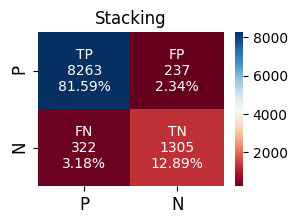

<Figure size 640x480 with 0 Axes>

In [72]:
gerar_matriz_de_confusao(['Stacking'], [''], ['default'], [sclf], [X], y, stratifiedKfold)

Curva ROC

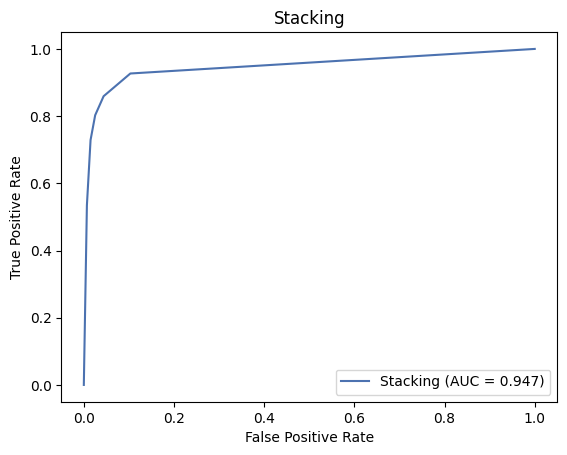

In [73]:
gerar_curva_roc(['Stacking'], [''], ['default'], [sclf], [X], y, stratifiedKfold)

### Comparaçao de Curvas ROC Stacking e classificadores individuais

In [74]:
def gerar_comparacao_curva_roc(clf_names, param_descs, dataset_names, clf_list, X_list, y, cv):
  plt.rcParams.update(plt.rcParamsDefault)
  color = ['b','g','r','c','m','b','g','r','c','m','k']
  style = ['-.','--',':','-','--',':','-.','--',':','-','-']
  for i in range(0, len(clf_list)):
      probs = cross_val_predict(clf_list[i], X_list[i], y, cv=cv, method='predict_proba')
      fpr, tpr, threshold = metrics.roc_curve(y, probs[:,1])
      roc_auc = metrics.auc(fpr, tpr)

      plt.plot(fpr, tpr, 'b', label = '%s (AUC = %.3f)' % (clf_names[i],roc_auc), color=color[i], linestyle=style[i])
  #plt.figure()
  #plt.title('%s - %s - %s' % (clf_names[i], param_descs[i], dataset_names[i]))
  plt.legend(loc = 'lower right',fontsize=11)
  #plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.ylabel('Taxa de Verdadeiro Positivo',size=15)
  plt.xlabel('Taxa de Falso Positivo',size=15)
  plt.xticks(fontsize= 12)
  plt.yticks(fontsize= 12)
  plt.savefig("comparacao_de_curvas_roc.png", bbox_inches = "tight")

In [75]:
clf_names = [
   "kNN1",
   "kNN2",
   "kNN3",
   "kNN4",
   "NB1",
   "NB2",
   "AD1",
   "AD2",
   "AD3",
   "AD4",
   "Stacking"
]

dataset_names = [
    'normalized', 
    'pca', 
    'pca',
    'pca', 
    'default', 
    'pca',
    'default', 
    'normalized', 
    'normalized',
    'normalized',
    'default'
]

clf_list = [
    KNeighborsClassifier(n_neighbors=11),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=9),
    KNeighborsClassifier(n_neighbors=20),
    GaussianNB(),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=7),
    DecisionTreeClassifier(max_depth=7),
    DecisionTreeClassifier(max_depth=2),
    DecisionTreeClassifier(max_depth=20),
    sclf
]

param_descs = [
   "k=%0.0f" % (clf_list[0].n_neighbors),
   "k=%0.0f" % (clf_list[1].n_neighbors),
   "k=%0.0f" % (clf_list[2].n_neighbors),
   "k=%0.0f" % (clf_list[3].n_neighbors),
   "var_smoothing=%0.10f" % (clf_list[4].var_smoothing),
   "var_smoothing=%0.10f" % (clf_list[5].var_smoothing),
   "max_depth=%0.0f" % (clf_list[6].max_depth),
   "max_depth=%0.0f" % (clf_list[7].max_depth),
   "max_depth=%0.0f" % (clf_list[8].max_depth),
   "max_depth=%0.0f" % (clf_list[9].max_depth),
   ""
]



X_list = [
   X_norm,
   X_pca,
   X_pca,
   X_pca,
   X,
   X_pca,
   X,
   X_norm,
   X_norm,
   X_norm,
   X
]

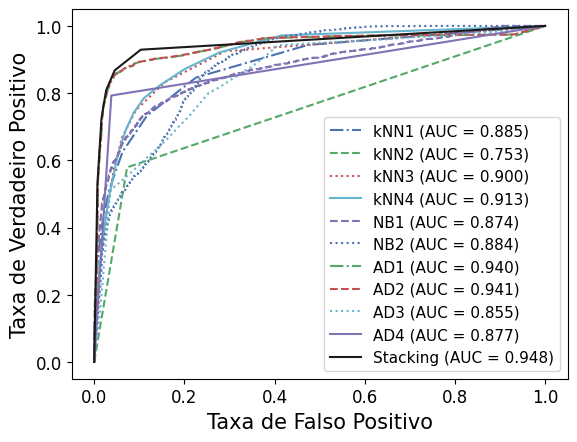

In [76]:
gerar_comparacao_curva_roc(clf_names, param_descs, dataset_names, clf_list, X_list, y, stratifiedKfold)